In [1]:
!pip install networkx
!pip install fraction

In [2]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict
import copy
import random
from fraction import Fraction
import math
from tqdm import tqdm

# Data and Setting 
#### There are many options to collect and build the Wikipedia's underlying network, we rely on the dataset provided here. For the purpose of our exploration, we do not consider the entire dataset. Instead, we focus on the articles belonging to a subset of categories.

Download the reduced version of the graph Wikicat hyperlink graph. Every row indicates an edge. In particular, the two elements are the source and the target, respectively.
From this page download:
wiki-topcats-categories.txt.gz: list of pages per category
wiki-topcats-page-names.txt.gz: page names
Note that in the reduced version of the network we removed the categories whose number of articles in less than 5000 and more than 30000.

In [3]:
# Download data 

In [4]:
edges = pd.read_csv("wikigraph_reduced.csv", sep = "\t")
edges.columns = ['index', "source", "dest"] # update the column name 

In [5]:
edges.drop(['index'], axis = 1, inplace = True)
edges.head()

,source,dest
0,95,1185516
1,108,1059989
2,108,1062426
3,108,1161925
4,134,541222


In [6]:
# Download categories 

In [7]:
categories = pd.read_csv("wiki-topcats-categories.txt", sep=";", names = ["Category", "Pages List"])
# cleaning data deviding to two columns 
categories["Category"] = categories.Category.apply(lambda x: x[9:]) # creating category columns 
categories["Pages List"] = categories["Pages List"].apply(lambda x: x.split()) # creating page_list columns
categories

,Category,Pages List
0,Buprestoidea,"[301, 302, 303, 304, 305, 306, 307, 308, 309, ..."
1,People_from_Worcester,"[1056, 1057, 1058, 1059, 1060, 60971, 76515, 7..."
2,Skin_conditions_resulting_from_physical_factors,"[971, 973, 1166, 1167, 1168, 1169, 1170, 1171,..."
3,Visual_kei_bands,"[1297, 1300, 1311, 1312, 1313, 1314, 1315, 131..."
4,Japanese_rock_music_groups,"[1297, 1300, 1313, 1314, 1315, 1316, 1319, 132..."
...,...,...
17359,British_science_fiction_novels,"[16110, 24545, 39814, 67923, 108629, 108630, 1..."
17360,Television_soundtracks,"[1117, 110192, 110376, 110377, 110380, 110395,..."
17361,Diptera_of_North_America,"[279, 280, 283, 31110, 31129, 31133, 31138, 31..."
17362,Diptera_of_Asia,"[279, 31129, 31133, 31134, 31135, 31136, 31137..."


In [8]:
# Download page_names  

In [9]:
col_1 = []
col_2 = []
f=  open (r'wiki-topcats-page-names.txt', 'r')
count = 0
for file in tqdm(f):
    z = file.split(' ',maxsplit = 1)
    col_1.append(z[0])
    col_2.append(z[1].replace('\n', ''))

1791489it [00:01, 1004454.18it/s]


In [10]:
page_names = pd.DataFrame()
page_names['index'] = col_1
page_names['name'] =  col_2
page_names.to_csv('page_names.csv')

In [11]:
page_names = pd.read_csv('page_names.csv')

# Q1.

### Build the graph G=(V, E), where V is the set of articles and E the hyperlinks among them

In [12]:
G = nx.DiGraph()
for i in tqdm(range(len(edges[:]))):
    G.add_edge(edges.loc[i][0], edges.loc[i][1])

100%|██████████| 483094/483094 [02:08<00:00, 3748.50it/s]


### Is the graph directed?

#### As we can see from the edges dataframe graph is directed.

In [ ]:
# As we can see from the edges dataframe graph is directed.
nx.draw(G, node_size=0.2 )

### How many articles are we considering?

In [13]:
# Number of articles
print('No of article are {}'.format(len(set.union(set(edges['source'].unique()), set(edges['dest'].unique())))))

No of article are 98343


### How many hyperlinks between pages exist?

In [14]:
# Number of edges
print('No of edges are {}'.format( len(edges)))

No of edges are 483094


### Compute the average number of links in an arbitrary page. What is the graph density?

In [15]:
# Compute the average number of links in an arbitrary page
np.mean(list(dict(G.degree).values()))

9.824674862471147

### Do you believe that the graph is dense or sparse. What is the graph density?


#### As we can see the value of density is small hence we can conlude that it is sparse

In [16]:
# Let's calculate density of a graph,
# As we can see the value of density is small hence we can conlude that it is sparse
n = len(G.nodes)
m = len(G.edges)
print("Density of graph is {}".format(m/(n*(n-1))))

Density of graph is 4.9951571365597335e-05


### Do you believe that the graph is dense or sparse? Is the graph dense? Visualize the nodes' degree distribution

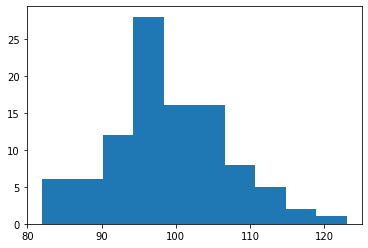

In [17]:
# PLotting degree didtrubution 
def degree_dist(G):
    d = [G.degree(n) for n in G.nodes()]
    plt.hist(d)
    plt.show()

degree_dist(nx.gnp_random_graph(100, 0.5
                                , directed=True))

## Q.2 :

### Define a function that takes in input :

A page v
A number of clicks d
and returns the set of all pages that a user can reach within d clicks.



#### at first step we define more convinient version of edge_dict dictionary witch has key values equal to sources and corresponding value equal to neighbours and first destination of that source 

In [39]:
source_node = list(edges["source"])
dest_node = list(edges["dest"])
links = []
for i,j in zip(edges['source'],edges['dest']):
    links.append((i,j))

In [40]:
edge_dict = defaultdict(list)
for i in range(len(source_node)):
    edge_dict[source_node[i]].append(dest_node[i])

In [41]:
def No_of_clicks(given_list, c):
    b = c
    given_list = given_list
    click = []
    list_std = []
    while b >0 :
        z = []
        for i in tqdm(given_list):
        #         print(i)
            try:        
                for j in edge_dict[i]: 
                    z.append(j)
                    click.append(j)       
            except:
                pass

        given_list =z
        b = b - 1 
    return click

In [42]:
source_node = list(edges["source"])
dest_node = list(edges["dest"])
union_node = list(set.union(set(source_node),set(dest_node)))

In [45]:
# asking proper inputs from user 
source_node = int(input('please enter the source node '))
c = int(input('How many clicks you want '))

please enter the source node 134
How many clicks you want 2


In [46]:
given_list = [source_node]
Total_nodes_reched = No_of_clicks(given_list, c)

100%|██████████| 4/4 [00:00<00:00, 12738.96it/s]


In [47]:
# No of nodes can be reached with given clicks
print(Total_nodes_reched)

[541222, 1061485, 1163610, 1163783, 536864, 538134, 543070, 1110882, 134, 62637, 355747, 358205, 530893, 823545, 1025352, 1025885, 1026878, 1053045, 1056077, 1056294, 1056873, 1056874, 1056964, 1056966, 1057565, 1057624, 1057685, 1058035, 1058047, 1058420, 1058860, 1059622, 1060082, 1060600, 1060768, 1061245, 1061249, 1061352, 1061422, 1061427, 1061444, 1061445, 1061450, 1061452, 1061461, 1061463, 1061466, 1061486, 1061487, 1061488, 1061489, 1061494, 1061502, 1061503, 1061506, 1061507, 1061552, 1061564, 1061565, 1061606, 1061902, 1062637, 1062705, 1063007, 1065425, 1065712, 1065725, 1066078, 1162401, 1163140, 1163675, 1163706, 1163711, 1163712, 1163713, 1163717, 1163722, 1163723, 1163727, 1163732, 1163733, 1163735, 1163744, 1163754, 1246598, 1265236, 1265356, 1265367, 1265376, 1265422, 1266105, 1266113, 1266608, 1270720, 1400636, 1502817, 134, 19415, 339891, 573333, 574081, 636021, 696881, 771113, 789467, 925690, 930923, 1028354, 1049218, 1049509, 1050418, 1052967, 1056873, 1057478, 10

## Q3.
#### Define a function that takes in input:

A category C
A set of pages in C, p = {p1, ..., pn}
and returns the minimum number of clicks required to reach all pages in p, starting from the page v, corresponding to the most central article, according to the in-degree centrality, in C.

Consider that:

The algorithm needs to handle the case that the graph is not connected, thus not all the pages in p are reachable from v. In such scenario, it is enough to let the program give in output the string "Not possible".
Since we are dealing with graph exploration, you can pass more than once on the same page pi.
Since the problem’s complexity is high, consider to provide just an approximation/heuristic solution for the problem.
You can use whatever metrics of centrality.


In [28]:
def bfs_counter(source , dest , edge_dict, keys):

    queue = []
    counter = 0
    visited = defaultdict()
    for key in keys : 
        visited[key] = False
        for i in edge_dict[key]:
            visited[i] = False

    
    queue.append(source)
    visited [source] = True
    if source != dest:
        
        while (len(queue) != 0) :

            u = queue[0] # start from first elemnt available at queue list 
            queue.pop(0)# delete this from queue and return it 
            neighbour = edge_dict[u]

            for i in neighbour:
                if visited[i] == False :

                    visited[i] = True 
                    queue.append(i) 
                    counter += 1 #to calculate path length 

                    if (i == dest):
                        return counter
    
    counter = np.infty
    return counter


In [29]:
def cat_clicks(cat, edge_dict):
    dictionary_of_indegree = dict(edges['source'].value_counts())
    maxi = []

    the_list =  [int(i) for i in cat['Pages List'][0]]
    for i in the_list:
        try:
            maxi.append(( dictionary_of_indegree[i], i))
        except Exception as e:
            pass
    if len(maxi)>0 :
        start = max(maxi)[1]

        keys = edge_dict.keys()
        for i in the_list:
            counter = bfs_counter(start , i , edge_dict, keys )
            if counter != np.inf:
                print('Clicks required from {} to {} is {}'.format(start, i, counter))
            else:
                print('Not possible from {} to {}'.format(start, i))
    else:
        print(' Exception:  You don"t have node with in degree ')

In [30]:
cat = input('Please enter thr category ')
if cat in list(categories['Category']):
    cat = categories[categories['Category'] ==  cat].reset_index(drop=True)
    cat_clicks(cat, edge_dict)
else:
    print(' Exception:  INvalid category please try again ')

Please enter thr category People_from_Worcester
Not possible from 540020 to 1056
Not possible from 540020 to 1057
Not possible from 540020 to 1058
Not possible from 540020 to 1059
Not possible from 540020 to 1060
Not possible from 540020 to 60971
Not possible from 540020 to 76515
Not possible from 540020 to 76871
Not possible from 540020 to 78094
Clicks required from 540020 to 79069 is 44247
Not possible from 540020 to 79139
Clicks required from 540020 to 79143 is 51852
Not possible from 540020 to 80237
Not possible from 540020 to 84108
Not possible from 540020 to 84354
Not possible from 540020 to 84740
Not possible from 540020 to 85268
Not possible from 540020 to 85767
Clicks required from 540020 to 89734 is 51843
Not possible from 540020 to 90171
Not possible from 540020 to 95330
Not possible from 540020 to 158412
Not possible from 540020 to 166087
Not possible from 540020 to 194583
Not possible from 540020 to 196217
Not possible from 540020 to 216650
Not possible from 540020 to 2167

## Q4.
#### Given in input two categories: C1 and C2, we get the subgraph induced by all the articles in the two categories.

Let v and u two arbitrary pages in the subgraph. What is the minimum set of hyperlinks one can remove to disconnect u and v?


### Brief Explanations about our approach :

at first we define bfs function according to the algorithm we talked about during the course and then we define extra function path_finder through these two dunctions at the first we calculate the shortest path adn then we find the exact address od path and by deleting set of hyperlinks related to this path we check again is there any other possible second shorts path or not if it exist after deleting this existance path we check again until two concidered nodes get disconnected. so the output of our main function is the number of shortest path we need to delete to make corresponding nodes disconnected 


all of these calculationd are apply to sungraph of choosen two classes by user and just includes all available nodes in these two classes and two nodes are choosen randomly consequtively from two classes 

In [156]:
def bfs(source , dest , edge_dict , distance = defaultdict(),parent = defaultdict()):
    queue = []
    visited = defaultdict()
    distance = defaultdict()
    parent = defaultdict()
   
    
    if source == dest:
        return (False, print('Source and dest are same'))
    
    for node in edge_dict.keys():
        visited[node] = False
        distance[node] = np.inf
        parent [node] = -1
    for key in edge_dict.keys():
        for i in range(len(edge_dict[key])): 
            node = edge_dict[key][i]
            visited[node] = False
            distance[node] = np.inf
            parent [node] = -1
            
    queue.append(source)
    visited [source] = True
    while (len(queue) != 0) :
        u = queue[0] # start from first elemnt available at queue list 
        queue.pop(0)# delete this from queue and return it 
        neighbour = edge_dict[u]
        if len(neighbour) != 0:
            for i in range(len(neighbour)):
                if visited[neighbour[i]] == False :
                    visited[neighbour[i]] = True 
                    distance[neighbour[i]] = distance[u] + 1
                    parent[neighbour[i]] = u
                    queue.append(neighbour[i]) 

                    if (neighbour[i] == dest):
                        return True , parent

        
    return False,parent

In [157]:
def path_finder(source , dest , edge_dict):
    
    [result , parent] = bfs(source , dest , edge_dict , distance = defaultdict(),parent = defaultdict())
    
    if (result == False):
        print("Not Connected")
  
    # vector path stores the shortest path
    if (result == True):
        
        path = defaultdict(list)
        mid_node = dest
        path[mid_node].append("1")
        

    for key in parent.keys():
        if (parent[key] != -1):
            if parent[key] not in path.values():
            
                path[parent[key]].append("1")



    return path.keys()

In [167]:
def find_min_path_delete_to_disconnect(first_node, second_node, di):
    if first_node != second_node:
        dict_ = di
        counter = 0
        while (bfs(first_node , second_node,dict_)[0]==True):
            zz = path_finder(first_node , second_node, dict_)
            counter +=1
            new_data = edges[(~edges['source'].isin(list(zz)[1:]) )|(~edges['dest'].isin(list(zz)[1:]))]
        #     new_data = edges[~edges['dest'].isin(list(zz)[1:])]
            new_data.reset_index(drop=True, inplace = True)
            dict_ = defaultdict(list)

            for i in range(len(new_data)):
                dict_[new_data['source'][i]].append(new_data['dest'][i])
            edges = new_data
        
        if counter ==0 :
            print('Randomly choosen node are not connected')
        else:
            print("The minimum number of required path to delete connection between two node ",counter)
    else:
        print('Source and dest are same')

In [166]:
cat_1 = input('Please enter first category ')
cat_2 = input('Please enter first category ')
if cat_1 == cat_2:
    print('Please enter two different categories')
elif cat_1 not in list(categories['Category']):
    print('Please enter valid cat1')
elif cat_2 not in list(categories['Category']):
    print('Please enter valid cat2')

Please enter first category Buprestoidea
Please enter first category People_from_Worcester


In [168]:
cat_1 =categories[categories['Category']== cat_1].reset_index(drop = True)['Pages List'][0]
cat_2 = categories[categories['Category']== cat_2].reset_index(drop = True)['Pages List'][0]
cat_1 = [int(i) for i in cat_1]
cat_2 = [int(i) for i in cat_2]


# we are assuming that , They may be connected with the subgraph
temp_df = edges[edges['source'].isin(cat_1+cat_2) | edges['dest'].isin(cat_1 + cat_2)].reset_index(drop=True)
source_node_cat = list(temp_df["source"])
dest_node_cat = list(temp_df["dest"])
edge_dict_cat = defaultdict(list)
for i in range(len(source_node_cat)):
    edge_dict_cat[source_node_cat[i]].append(dest_node_cat[i])
u = random.choice(cat_1)
v = random.choice(cat_2)

find_min_path_delete_to_disconnect(u, v, edge_dict_cat)

Randomly choosen node are not connected


## Q5.
#### Write a function that, given an arbitrary category C0 as input, returns the list of remaning categories sorted by their distance from C0. In particular, the distance between two categories is defined as

distance(C0, Ci) = median(ShortestPath(C0, Ci))

where ShortestPath(C0, Ci) is the set of shortest paths from each pair of nodes in the two categories.


### Brief Explanations about our approach :

In this question we worked with limited version of categories data frame wich just includes page list with values between 5000 and 30000 and also nodes in this range.

our function get as an input the category choosen by user and category data frame and as an out put we will see data frame that sorts categories with respect to their distance with choosen category 

In [48]:
edges_ = edges.copy(deep=True)
edges_ = edges_[edges_['source']>5000]
edges_ = edges_[edges_['source']<30000]
edges_ = edges_[edges_['dest']>5000]
edges_ = edges_[edges_['dest']<30000]
edges_
source_node_ = list(edges_["source"])
dest_node_ = list(edges_["dest"])
edge_dict_re = defaultdict(list)
for i in range(len(source_node_)):
    edge_dict_re[source_node_[i]].append(dest_node_[i])
len(edge_dict),len(edge_dict_re)

(90920, 77)

In [49]:
def category_reducer(cat):
    main_cat =categories[categories['Category']== cat].reset_index(drop = True)['Pages List'][0]
# cat_1 = [int(i) for i in main_cat]
    cat_ = [int(i) for i in main_cat if int(i)<30000 and int(i)>5000]
    return cat_

In [50]:
category = categories.copy(deep=True)
category['Reduce_Page_list'] = category['Category'].apply(category_reducer)
category = category[category['Reduce_Page_list'].map(lambda d: len(d) > 0) ]

In [34]:
def bfs_counter(source , dest , edge_dict, keys,visited ):
    
    queue = []
    counter = 0
    queue.append(source)

    visited [source] = True
    if source != dest:
        
        while (len(queue) != 0) :

            u = queue[0] # start from first elemnt available at queue list 
            queue.pop(0)# delete this from queue and return it 
            neighbour = edge_dict[u]

            for i in neighbour:
                if visited[i] == False :

                    visited[i] = True 
                    queue.append(i) 
                    counter += 1 #to calculate path length 

                    if (i == dest):
                        return counter
    
    counter = np.infty
    return counter


In [30]:
category = categories.copy(deep=True)
category['Reduce_Page_list'] = category['Category'].apply(category_reducer)
category = category[category['Reduce_Page_list'].map(lambda d: len(d) > 0) ]

In [31]:
def category_sorter(ask_cat , category ,edge_dict_re):   
    main_cat =category[category['Category']== ask_cat].reset_index(drop = True)['Pages List'][0]
    
    cat_1 = [int(i) for i in main_cat if int(i)<30000 and int(i)>5000]

    all_cat = category[~(category['Category']== ask_cat)]
  
    a=[]
    b=[]
    for cat in tqdm(all_cat['Category']) :

        cat_2 = category[category['Category']== cat ].reset_index(drop = True)['Reduce_Page_list'][0]

        temp_df = edges_[edges_['source'].isin(cat_1+cat_2) | edges_['dest'].isin(cat_1 + cat_2)].reset_index(drop=True)
        source_node_cat = list(temp_df["source"])
        dest_node_cat = list(temp_df["dest"])

        edge_dict_cat = defaultdict(list)
        for i in range(len(source_node_cat)):
            edge_dict_cat[source_node_cat[i]].append(dest_node_cat[i])

        median_collector = []

        keys = edge_dict_re.keys()
        visited = defaultdict()
        for key in keys : 
            visited[key] = False
            for i in edge_dict_re[key]:
                visited[i] = False

        for source in source_node_cat:
            for dest in dest_node_cat:

                visit =  copy.deepcopy(visited)
                counter = bfs_counter(source , dest , edge_dict_re, keys,visit)

                if counter != np.inf :
                    median_collector.append(counter)

                    a.append([counter,source,dest])

        if len(median_collector)>=1 :
            b.append(('British_science_fiction_novels' , cat , np.median(median_collector)))
    cat_name= []
    distance = []
    for i in b :
        cat_name.append(i[1])
        distance.append(i[2])
    sorted_df = pd.DataFrame()
    sorted_df['cat_name'] = cat_name
    sorted_df['distance'] = distance
    sorted_df.sort_values(by=['distance'],ascending=False)
    

    return(sorted_df.sort_values(by=['distance'],ascending=False))

In [38]:
ask_cat = input()
if ask_cat not in list(categories['Category']):
    print('Please enter valid cat1')
else:
    print(category_sorter(ask_cat , category ,edge_dict_re))


British_science_fiction_novels


100%|██████████| 4939/4939 [00:17<00:00, 279.07it/s]


,cat_name,distance
260,Slovakia_international_footballers,11.0
261,Slovak_footballers,11.0
141,OFK_Beograd_players,9.0
152,Portuguese_expatriate_footballers,7.0
160,Estrela_da_Amadora_players,7.0
...,...,...
118,FC_Sion_players,1.0
119,Computer_programmers,1.0
120,American_technology_writers,1.0
121,Year_of_death_missing,1.0


## Q_6 :


In [151]:
def Ranking_Page(category,edges,num_iter): 
    source_node = list(edges["source"])
    dest_node = list(edges["dest"])

    neighbour_dict = defaultdict(list)
    for i in range(len(source_node)):
        neighbour_dict[source_node[i]].append(dest_node[i])

    neighbour_dict_dest = defaultdict(list)
    for i in range(len(source_node)):
        neighbour_dict_dest[dest_node[i]].append(source_node[i])

    union_node = list(set.union(set(source_node),set(dest_node)))

    dangeling=[]
    for key in union_node:
        if len(neighbour_dict_dest[key])==0 :
            dangeling.append(key)

    iter_dict = {}
    for node in union_node:
        iter_dict[node] =Fraction(1,len(union_node))
    for i in tqdm(num_iter):
        counter = 0
        iter_dict2 = copy.deepcopy(iter_dict)

        for key in union_node:

            if len(neighbour_dict_dest[key])>0 :

                s =Fraction(0)
                for conect in neighbour_dict_dest[key]:

                    s = s + iter_dict[conect]/Fraction(len(neighbour_dict[conect]))
            else :
                counter +=1
                s = Fraction(0)


            iter_dict2[key] = s
        check = Fraction(0)
        for  key in iter_dict2 :
            check= check+iter_dict2[key]
        for d in dangeling :
            iter_dict2[d] = (Fraction(1)-check)/Fraction(len(dangeling))

        iter_dict = copy.deepcopy(iter_dict2)


    page_rank = defaultdict(list)
    for cat in tqdm(category['Category']):
        for node in list(category[category['Category']==cat]['Reduce_Page_list'])[0]:
            if int(node) in union_node:
                page_rank[cat].append(iter_dict2[int(node)])


    category_name = {}
    # rank = []
    for key in page_rank:
    #     category_name .append(key)
        j=Fraction(0)
        for k in range(len(page_rank[key])) :
            j=j+page_rank[key][k]
        category_name[key] = j

    sorted_page_rank = pd.DataFrame()
    sorted_page_rank['cat_name'] = category_name.keys()
    sorted_page_rank['Page_rank'] = category_name.values()
    return sorted_page_rank

In [153]:
Ranking_Page(category,edges,4)

100%|██████████| 4940/4940 [02:30<00:00, 32.87it/s] 


,cat_name,Page_rank
0,Molecular_biologists,1/98343
1,American_geneticists,1/98343
2,Nobel_laureates_in_Physiology_or_Medicine,2/98343
3,Strategic_Air_Command,1/98343
4,Recipients_of_the_Air_Medal,1/98343
...,...,...
533,University_of_Chicago_alumni,1/98343
534,Harvard_University_faculty,1/32781
535,University_of_Chicago_faculty,2/98343
536,American_television_films,4/98343
